# EE613 - Nonlinear Regression I - Exercise 1: Gaussian Operations

For examples on computing several Gaussian operations, you can refer to demo_Gaussian_Ops.ipynb

In [2]:
import sys
sys.path.append('../lib')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from mixture_model import *
from plot_utils import *
%load_ext autoreload
%autoreload 2

***

### Question 1: Gaussian Conditioning

#### Load Data 

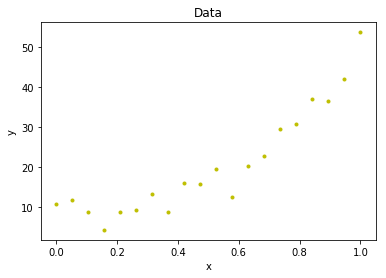

In [4]:
filename = '../python_data/func_example.npy'
data = np.load(open(filename,'rb'))
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'.y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()

a) Given the data {x,y} above, estimate the joint probability distribution as a single Gaussian, i.e.
$$p(x,y) = \mathcal{N}(\mu,\Sigma)$$

#### Test Data 

b) Given $x_{test}$, calculate the conditional distribution $p(y|x = x_{test})$. You need to get the mean ($\bar{y})$ and the variance ($\sigma$) of $y$ for each value of $x_{test}$.

c) Plot the graph of x_test agains the mean prediction ($\bar{y})$, and also plot the variance. You can use the function 'plot_with_covs_1D' (see demo_GMR.ipynb, the section 'Plotting the output distribution')

d) What are the similarity and the difference between:
- Estimating $p(x,y)$ and computing the conditional probability $p(y|x)$, and 
- Performing linear regression on the data (x,y) 

### Q1 Solution 

#### a) Estimate joint probability 

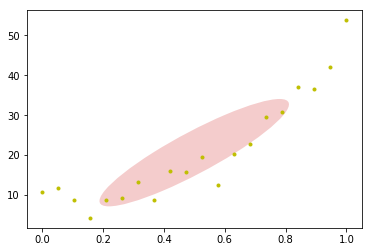

In [5]:
#construct joint data of input and output
data = np.vstack([x,y]).T

#compute the mean and covariance of the Gaussian
mu = np.mean(data,axis=0)
sigma = np.cov(data.T)

#Plot the estimated Gaussian distribution
fig,ax = plt.subplots()
plot_gaussian_2D(mu,sigma,ax,color=[0.8,0.,0.],alpha=0.2)
plt.plot(x,y,'.y')

#### b) Conditioning on $x_{test}$ 

In [6]:
mu_x = mu[0]
mu_y = mu[1]
sigma_xx = sigma[0,0]
sigma_yy = sigma[1,1]
sigma_xy = sigma[0,1]
sigma_yx = sigma[1,0]

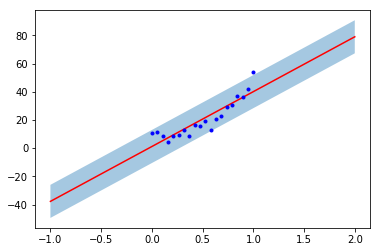

In [7]:
x_test = np.linspace(-1, 2, 100)
preds, covs = [],[]
for x_i in x_test:
    pred_y = mu_y + sigma_yx/sigma_xx*(x_i-mu_x)
    cov_y = sigma_yy - (sigma_yx/sigma_xx)*sigma_xy
    preds.append(pred_y)
    covs.append(cov_y)
    
fig,ax = plt.subplots()
plot_with_covs_1D(x_test,preds,covs,ax)
plt.plot(x,y,'.b')

***

### Question 2: Gaussian Product, Weighted Sum of Gaussians, and Moment Matching 

#### Generate K Gaussians 

Text(0.5,1,'K Gaussians')

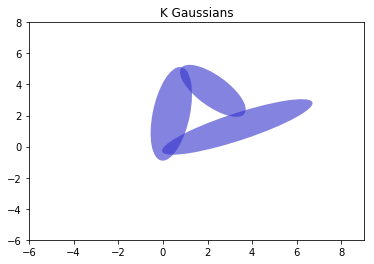

In [13]:
mus = []
sigmas = []
n_states = 3
n_var = 2
factor = 2
fig,ax = plt.subplots()
for i in range(n_states):
    mus.append(np.random.rand(2)*factor*2)
    d = np.random.normal(size=2)*factor
    sigmas.append(np.outer(d,d) + np.eye(n_var)*7e-1)
    plot_gaussian_2D(mus[-1],sigmas[-1],ax,alpha = 0.6,color = [0.2,0.2,0.8])

bounds = [-6,9,-6,8]
plt.axis(bounds)
plt.title('K Gaussians')

Given the K Gaussians, compute: 
- The product of the K Gaussians
- The weighted sum of the K Gaussians
- A Gaussian approximation of the K Gaussians via moment matching. The K Gaussians here is treated as a Gaussian mixture with some predefined weights.

How are they different?

Note: for the last two, use the following weights: $$w = [0.3, 0.3, 0.4]$$
Be careful about the distinction between K Gaussians and a Gaussian mixture with K components.



### Solution 

#### Product of K Gaussians

[-6, 9, -6, 8]

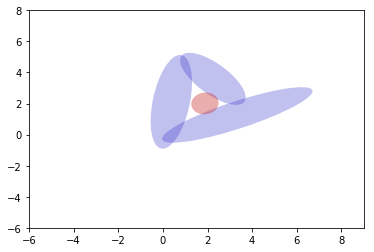

In [14]:
Sigma_tmp = np.zeros((n_var, n_var))
Mu_tmp = np.zeros(n_var)

for i in range(n_states):
    Sigma_tmp += np.linalg.inv(sigmas[i])
    Mu_tmp += np.dot(np.linalg.inv(sigmas[i]), mus[i])
Sigma = np.linalg.inv(Sigma_tmp)
Mu = np.dot(Sigma,Mu_tmp) 

#plot K Gaussians
fig,ax = plt.subplots()
for i in range(n_states):
    plot_gaussian_2D(mus[i], sigmas[i],ax,color = [0.2,0.2,0.8],alpha = 0.3)

#plot the product
plot_gaussian_2D(Mu,Sigma,ax,color = [0.8,0.2,0.2], alpha = 0.4)
plt.axis(bounds)

#### Weighted sum of K Gaussians

[-6, 9, -6, 8]

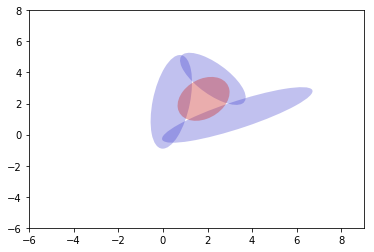

In [15]:
weights = [0.3,0.3,0.4]
Sigma = np.zeros((n_var, n_var))
Mu = np.zeros(n_var)

for i in range(n_states):
    Sigma += (weights[i]**2)*sigmas[i]
    Mu += weights[i]*mus[i]

#plot K Gaussians
fig,ax = plt.subplots()
for i in range(n_states):
    plot_gaussian_2D(mus[i], sigmas[i],ax,color = [0.2,0.2,0.8],alpha = 0.3)

#plot the product
plot_gaussian_2D(Mu,Sigma,ax,color = [0.8,0.2,0.2], alpha = 0.4)
plt.axis(bounds)

#### Gaussian Approximation of a Gaussian Mixture

[-6, 9, -6, 8]

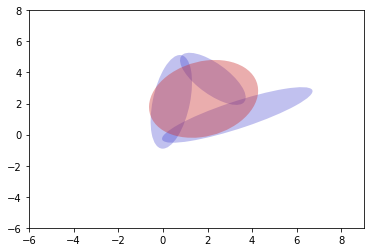

In [16]:
dim = 2
Sigma = np.zeros((dim, dim))
Mu = np.zeros(dim)
for k in range(n_states):
    Sigma += weights[k]*(sigmas[k] + np.outer(mus[k],mus[k]))
    Mu += weights[k]*mus[k]

Sigma -= np.outer(Mu, Mu)

#plot K Gaussians
fig,ax = plt.subplots()
for i in range(n_states):
    plot_gaussian_2D(mus[i], sigmas[i],ax,color = [0.2,0.2,0.8],alpha = 0.3)

#plot the product
plot_gaussian_2D(Mu,Sigma,ax,color = [0.8,0.2,0.2], alpha = 0.4)
plt.axis(bounds)

***